## Penguins ML

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


### EDA

In [2]:
penguins_df = pd.read_csv("penguins.csv", index_col="rowid")
penguins_df.index.name = None
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
penguins_df = penguins_df.rename(columns={'species':'Species','island':'Island', 'bill_length_mm':'BL / mm', 'bill_depth_mm':'BD / mm', 'flipper_length_mm':'FL / mm', 'body_mass_g':'BM / g', 'sex':'Sex', 'year':'Year'})

In [4]:
penguins_df.describe()

,BL / mm,BD / mm,FL / mm,BM / g,Year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [5]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 1 to 344
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  344 non-null    object 
 1   Island   344 non-null    object 
 2   BL / mm  342 non-null    float64
 3   BD / mm  342 non-null    float64
 4   FL / mm  342 non-null    float64
 5   BM / g   342 non-null    float64
 6   Sex      333 non-null    object 
 7   Year     344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 24.2+ KB


In [6]:
# penguins_df[['Species','Island','Sex']] = penguins_df[['Species','Island','Sex']].astype('string')

In [7]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 1 to 344
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  344 non-null    object 
 1   Island   344 non-null    object 
 2   BL / mm  342 non-null    float64
 3   BD / mm  342 non-null    float64
 4   FL / mm  342 non-null    float64
 5   BM / g   342 non-null    float64
 6   Sex      333 non-null    object 
 7   Year     344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 24.2+ KB


In [8]:
penguins_df['Species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [9]:
penguins_df['Island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [10]:
penguins_df['Sex'].unique()

array(['male', 'female', nan], dtype=object)

In [11]:
penguins_df['Year'].unique()

array([2007, 2008, 2009], dtype=int64)

In [12]:
penguins_df.duplicated().unique()

array([False])

In [13]:
penguins_df.isna().sum()

Species     0
Island      0
BL / mm     2
BD / mm     2
FL / mm     2
BM / g      2
Sex        11
Year        0
dtype: int64

In [14]:
penguins_df[penguins_df.isna().any(axis=1)]

,Species,Island,BL / mm,BD / mm,FL / mm,BM / g,Sex,Year
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
11,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
12,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
48,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
179,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
219,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
257,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
269,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [15]:
penguins_df = penguins_df.drop(columns="Year")
penguins_df = penguins_df.dropna()
penguins_df

,Species,Island,BL / mm,BD / mm,FL / mm,BM / g,Sex
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [16]:
penguins_df = penguins_df.replace(["male","female"],["Male","Female"])
penguins_df

,Species,Island,BL / mm,BD / mm,FL / mm,BM / g,Sex
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,Female
342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,Male
343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,Male


Sex        Female  Male
Species                
Adelie         73    73
Chinstrap      34    34
Gentoo         58    61


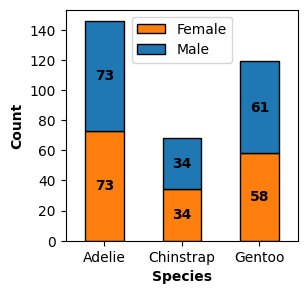

In [17]:
df = pd.pivot_table(penguins_df[['Species','Sex']], values='Sex', index=['Species'],
                       columns=['Sex'], aggfunc="value_counts")
print(df)
fig, axes = plt.subplots(figsize=(3,3))
df.plot(kind='bar',ax=axes, stacked = True, rot=0, color=['tab:orange','tab:blue'], edgecolor="black")
axes.set_ylabel("Count",fontweight="bold")
axes.set_xlabel("Species",fontweight="bold")
# axes.set_title("No. of Penguin Species per Sex",fontweight="bold")
axes.legend(["Female","Male"])
plt.savefig('Penguins Distribution.png')
for c in axes.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    labels = [int(i) for i in labels]
    # remove the labels parameter if it's not needed for customized labels
    axes.bar_label(c, labels=labels, label_type='center', fontweight="bold", color="black")

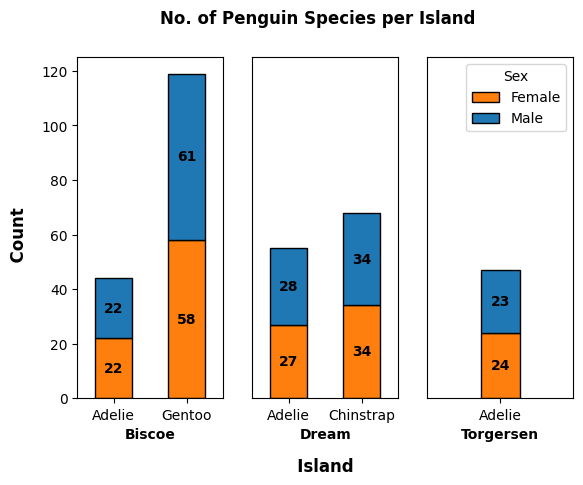

In [18]:
df = pd.pivot_table(penguins_df[['Island','Species','Sex']], values='Sex', index=['Island'],
                       columns=['Sex'], aggfunc="value_counts")
biscoe = df.loc['Biscoe']
dream = df.loc['Dream']
torgersen = df.loc['Torgersen']
plt.style.use('default')

fig, axes = plt.subplots(1,3, sharey=True)
biscoe.plot(kind='bar',ax=axes[0], stacked = True, rot=0, color=['tab:orange','tab:blue'], edgecolor="black")
axes[0].get_legend().remove()
axes[0].set_xlabel("Biscoe", fontweight="bold")
dream.plot(kind='bar',ax=axes[1], stacked = True, rot=0,color=['tab:orange','tab:blue'], edgecolor="black")
axes[1].get_legend().remove()
axes[1].set_xlabel("Dream",fontweight="bold")
plt.subplot(1,3,2)
plt.tick_params(left = False) 
torgersen.plot(kind='bar',ax=axes[2], stacked = True, rot=0, width=0.18, color=['tab:orange','tab:blue'], edgecolor="black")
axes[2].set_xlabel("Torgersen",fontweight="bold")
plt.subplot(1,3,3)
plt.tick_params(left = False) 
fig.supylabel("  Count",fontweight="bold")
fig.supxlabel("   Island",fontweight="bold")
fig.suptitle("No. of Penguin Species per Island",fontweight="bold")
plt.subplots_adjust(bottom=0.17)
for i in range(3):
    for c in axes[i].containers:
        # Optional: if the segment is small or 0, customize the labels
        labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
        labels = [int(i) for i in labels]
        # remove the labels parameter if it's not needed for customized labels
        axes[i].bar_label(c, labels=labels, label_type='center',fontweight="bold")

In [19]:
df = pd.pivot_table(penguins_df[['Species', 'BL / mm', 'BD / mm', 'FL / mm', 'BM / g', 'Sex']], values=['BL / mm', 'BD / mm', 'FL / mm', 'BM / g'], index=['Species'],
                       columns=['Sex'], aggfunc="mean")
df.round(2)

BD / mm        BL / mm          BM / g          FL / mm        
Sex        Female   Male  Female   Male   Female     Male  Female    Male
Species                                                                  
Adelie      17.62  19.07   37.26  40.39  3368.84  4043.49  187.79  192.41
Chinstrap   17.59  19.25   46.57  51.09  3527.21  3938.97  191.74  199.91
Gentoo      14.24  15.72   45.56  49.47  4679.74  5484.84  212.71  221.54

In [20]:
penguins_minmaxscaled_df = penguins_df.copy()
df = penguins_minmaxscaled_df[['BL / mm','BD / mm','FL / mm','BM / g']]
scaler = preprocessing.MinMaxScaler()
df = scaler.fit_transform(df)
penguins_minmaxscaled_df[['BL / mm','BD / mm','FL / mm','BM / g']] = df
penguins_minmaxscaled_df = penguins_minmaxscaled_df.rename(columns={'BL / mm':'BL', 'BD / mm':'BD', 'FL / mm':'FL', 'BM / g':'BM'})
penguins_minmaxscaled_df.head()

,Species,Island,BL,BD,FL,BM,Sex
1,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,Male
2,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,Female
3,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,Female
5,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,Female
6,Adelie,Torgersen,0.261818,0.892857,0.305085,0.263889,Male


In [21]:
def change_fm_order(penguin,penguins_minmaxscaled_df):
    index_list = list(penguins_minmaxscaled_df[(penguins_minmaxscaled_df["Species"]==penguin)].index.values)
    index_list[0], index_list[1] = index_list[1], index_list[0]
    df = penguins_minmaxscaled_df[(penguins_minmaxscaled_df["Species"]==penguin)].reindex(index_list)
    return df
df = penguins_minmaxscaled_df.copy()
df = change_fm_order("Adelie",df)
df

,Species,Island,BL,BD,FL,BM,Sex
2,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,Female
1,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,Male
3,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,Female
5,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,Female
6,Adelie,Torgersen,0.261818,0.892857,0.305085,0.263889,Male
...,...,...,...,...,...,...,...
148,Adelie,Dream,0.163636,0.630952,0.203390,0.215278,Female
149,Adelie,Dream,0.141818,0.559524,0.389831,0.208333,Female
150,Adelie,Dream,0.207273,0.595238,0.355932,0.291667,Male
151,Adelie,Dream,0.141818,0.476190,0.254237,0.277778,Female


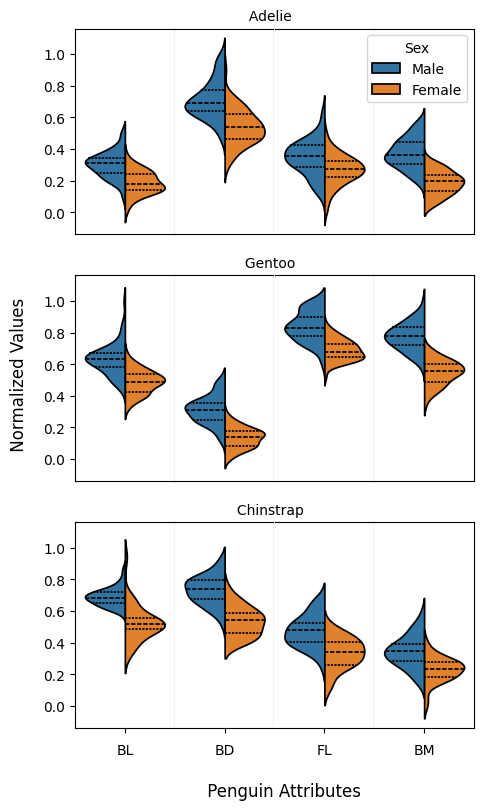

In [22]:
fig, axes = plt.subplots(3,4, figsize = [5,8], sharex=True, sharey= True)
fig.tight_layout()
sns.color_palette("tab10")

columns = ['BL','BD','FL','BM']
species = ['Adelie','Gentoo','Chinstrap']

for i, penguin in enumerate(species):
    for j, column in enumerate(columns):
        df = penguins_minmaxscaled_df.copy()
        if not(i==0):
            df = change_fm_order(penguin,df)
        else:
            df = penguins_minmaxscaled_df[(penguins_minmaxscaled_df["Species"]==penguin)]
        sns.violinplot(ax = axes[i,j], data=df, y=column, hue="Sex", split=True, inner="quart", linecolor="black")
        if not(i==0 and j==3):
            axes[i,j].get_legend().remove()
        axes[i,j].set_ylabel("")
        if not(j==0):
            axes[i,j].spines['left'].set_visible(False)
        if j==1:
            axes[i,j].set_title(label=("                     "+penguin), fontsize=10)

for i in range(12):
    i = i+1
    if not(i==1 or i==5 or i==9):
        plt.subplot(3,4,i)
        plt.tick_params(left = False)
    if i<9:
        plt.subplot(3,4,i)
        plt.tick_params(bottom = False)
    if i>8:
        plt.subplot(3,4,i)
        plt.xlabel(columns[i-9])


fig.supxlabel("             Penguin Attributes")   
fig.supylabel("             Normalized Values") 
# fig.suptitle("Dsitribution of Penguin Attributes per Species")     
plt.subplots_adjust(left= 0.15, bottom = 0.1, wspace=0, hspace=0.2)

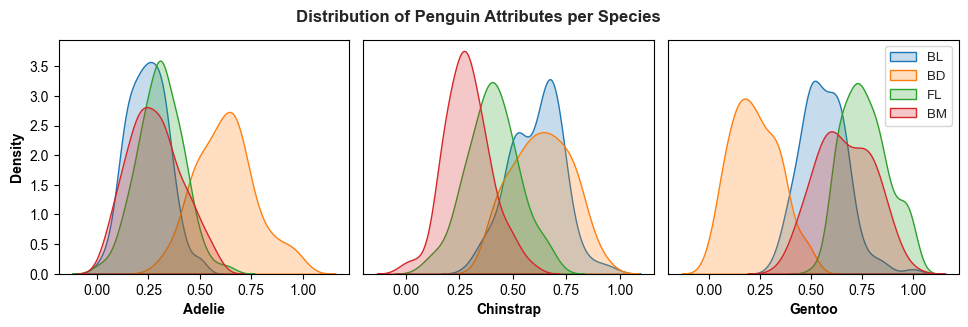

In [23]:
fig, axes = plt.subplots(1,3, figsize = [12,3], sharey= True)
sns.color_palette("tab10")
sns.set_style("white")

columns = ['BL','BD','FL','BM']
species = ['Adelie','Chinstrap', 'Gentoo']

for i, penguin in enumerate(species):
    for j, column in enumerate(columns):
        df = penguins_minmaxscaled_df.copy()
        df = penguins_minmaxscaled_df[(penguins_minmaxscaled_df["Species"]==penguin)]
        sns.kdeplot(ax = axes[i], data=df, x=column, fill=True)
    axes[i].set_xlabel(penguin, fontweight="bold")
    if i==0:
        axes[i].set_ylabel("Density", fontweight="bold")

for i in range(3):
    i = i+1
    if not(i==1):
        plt.subplot(1,3,i)
        plt.tick_params(left = False)


fig.suptitle("Distribution of Penguin Attributes per Species", fontweight="bold")
axes[2].legend(loc='upper right', labels=['BL','BD','FL','BM'], fontsize=9.5)    
plt.subplots_adjust(left= 0.15, bottom = 0.1, wspace=0.05, hspace=0.2)

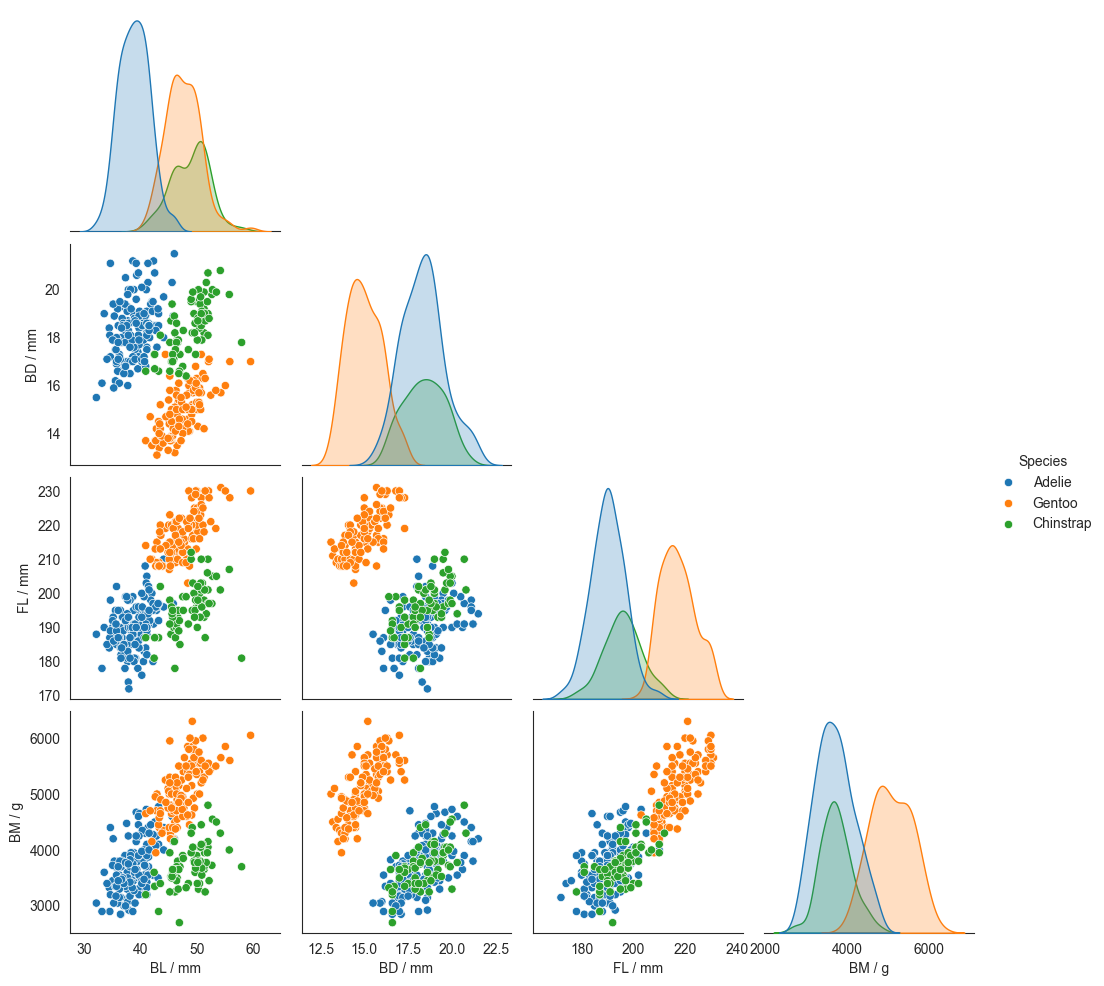

In [24]:
ax = sns.pairplot(data=penguins_df, hue='Species',palette="tab10", corner=True)

Text(0.5, 1.0, 'Average Correlation of Attributes per Species')

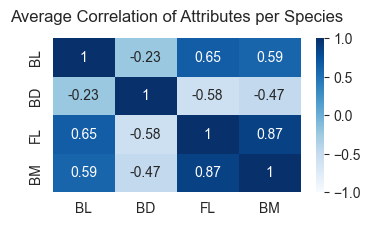

In [25]:
df = penguins_minmaxscaled_df[['BL','BD','FL','BM']]
plt.figure(figsize=(4, 2))
sns.color_palette("Blues", as_cmap=True)
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap = "Blues", xticklabels=['BL','BD','FL','BM'], yticklabels =['BL','BD','FL','BM'] )
heatmap.set_title('Average Correlation of Attributes per Species', fontdict={'fontsize':12}, pad=12)

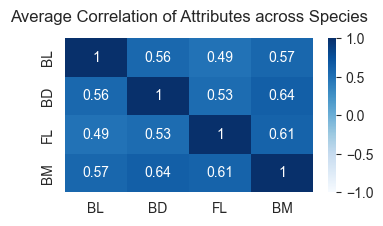

In [26]:
df = penguins_minmaxscaled_df[['Species','BL','BD','FL','BM']]
adelie = df[df['Species']=="Adelie"]
chinstrap = df[df['Species']=="Chinstrap"]
gentoo = df[df['Species']=="Gentoo"]
adelie = adelie[['BL','BD','FL','BM']].corr().to_numpy()
chinstrap = chinstrap[['BL','BD','FL','BM']].corr().to_numpy()
gentoo = gentoo[['BL','BD','FL','BM']].corr().to_numpy()
total = adelie + chinstrap + gentoo
avg_corr = total/3
avg_corr
plt.figure(figsize=(4, 2))
sns.color_palette("Blues", as_cmap=True)
heatmap = sns.heatmap(avg_corr, vmin=-1, vmax=1, annot=True, cmap = "Blues", xticklabels=['BL','BD','FL','BM'], yticklabels =['BL','BD','FL','BM'] )
heatmap.set_title('Average Correlation of Attributes across Species', fontdict={'fontsize':12}, pad=12);

### Unsupervised Learning

In [27]:
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

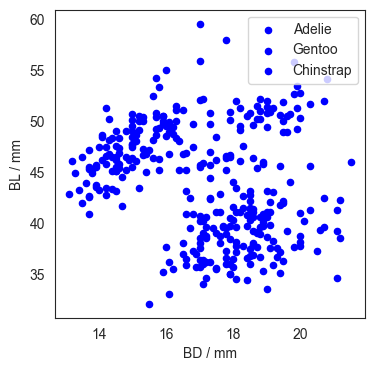

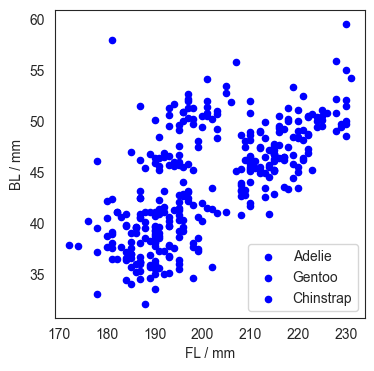

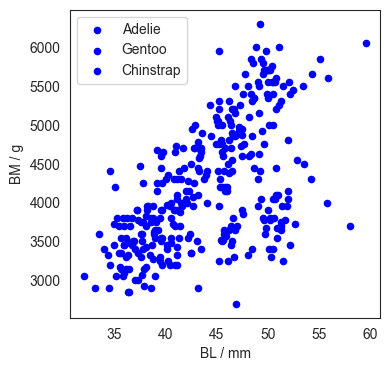

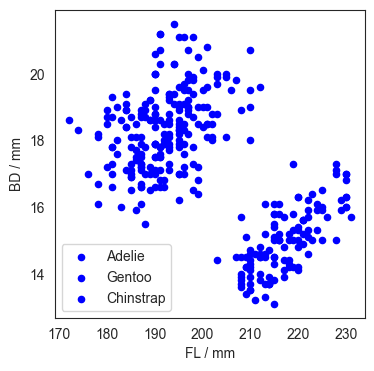

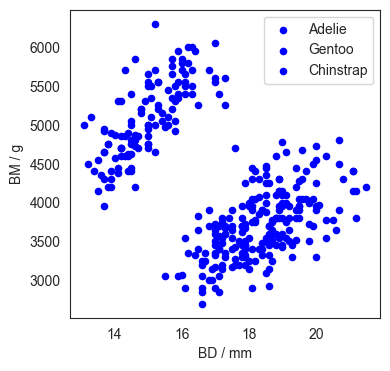

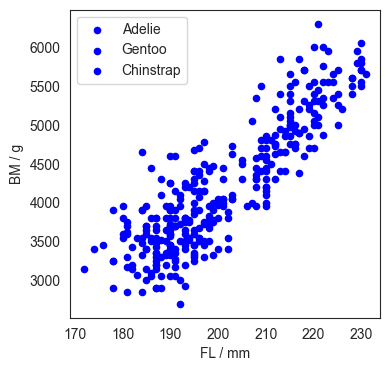

In [28]:
comb = [('BL / mm','BD / mm'), ('BL / mm','FL / mm'),('BM / g','BL / mm'),('BD / mm','FL / mm'),('BM / g','BD / mm'),('BM / g','FL / mm')]
for i, combination in enumerate(comb):
    y,x = combination
    fig, ax = plt.subplots(figsize=(4, 4))
    df = penguins_df[(penguins_df["Species"]=="Adelie")]
    df.plot.scatter(x,y,c="b",ax= ax)
    df = penguins_df[(penguins_df["Species"]=="Gentoo")]
    df.plot.scatter(x,y, c="b",ax= ax)
    df = penguins_df[(penguins_df["Species"]=="Chinstrap")]
    df.plot.scatter(x,y, c="b",ax= ax)
    ax.legend(labels=["Adelie","Gentoo","Chinstrap"])


In [29]:
stnd_scaler = StandardScaler()
penguins_standardised_df = penguins_df.copy()
penguins_standardised_df[['BL / mm','BD / mm','FL / mm','BM / g']] = stnd_scaler.fit_transform(penguins_df[['BL / mm','BD / mm','FL / mm','BM / g']])
column_encoder_dict = {}
for column in (penguins_standardised_df.columns):
    label_encoder_dict = {}
    if penguins_standardised_df[column].dtypes == "object":
        for i, unique_val in enumerate(penguins_standardised_df[column].unique()):
            penguins_standardised_df[column].replace(to_replace=unique_val, value=i, inplace=True)
            label_encoder_dict[unique_val]=i
    column_encoder_dict[column]=label_encoder_dict
print(column_encoder_dict)
penguins_standardised_df

{'Species': {'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2}, 'Island': {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}, 'BL / mm': {}, 'BD / mm': {}, 'FL / mm': {}, 'BM / g': {}, 'Sex': {'Male': 0, 'Female': 1}}


,Species,Island,BL / mm,BD / mm,FL / mm,BM / g,Sex
1,0,0,-0.896042,0.780732,-1.426752,-0.568475,0
2,0,0,-0.822788,0.119584,-1.069474,-0.506286,1
3,0,0,-0.676280,0.424729,-0.426373,-1.190361,1
5,0,0,-1.335566,1.085877,-0.569284,-0.941606,1
6,0,0,-0.859415,1.747026,-0.783651,-0.692852,0
...,...,...,...,...,...,...,...
340,2,2,2.162314,1.340165,0.431094,-0.257532,0
341,2,2,-0.090248,0.475587,0.073816,-1.003795,1
342,2,2,1.026876,0.526444,-0.569284,-0.537380,0
343,2,2,1.246638,0.933305,0.645461,-0.133155,0


In [31]:
n_neighbors = np.arange(5, 21, 5)
min_dist = np.arange(0.1, 0.9, 0.05)

from gap_statistic import OptimalK

def KMeans_clustering_func(X, k):
    """ 
    K Means Clustering function, which uses the K Means model from sklearn.
    
    These user-defined functions *must* take the X (input features) and a k 
    when initializing OptimalK
    """
    
    m = KMeans(random_state=13, n_clusters=k)
    m.fit(X)
    return m.cluster_centers_, m.predict(X)

n_2_max = -1
n_3_max = -1
n2_s = 0
n3_s = 0

for n in range(2,4):
    kmm = KMeans(n_clusters=n, max_iter=5000, random_state=13)
    for neighbor in n_neighbors:
        reducer = umap.UMAP(densmap=True, n_neighbors= neighbor, random_state=13)
        transformed_data = reducer.fit_transform(penguins_standardised_df[['BL / mm', 'BD / mm', 'FL / mm', 'BM / g']])
        kmm.fit(transformed_data)
        cluster_labels = kmm.fit_predict(transformed_data)
        silhouette_avg = silhouette_score(transformed_data, cluster_labels)
        optimalK = OptimalK(clusterer=KMeans_clustering_func)
        n_clusters = optimalK(transformed_data, cluster_array=[n])
        gap_value = optimalK.gap_df.iloc[0,1]

        if n==2 and silhouette_avg>n_2_max:
            n_2_max = silhouette_avg
            n2_s = neighbor
        elif n==3 and silhouette_avg>n_3_max:
            n_3_max = silhouette_avg
            n3_s = neighbor

C:\Users\rajdh\AppData\Roaming\Python\Python310\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\rajdh\AppData\Roaming\Python\Python310\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\rajdh\AppData\Roaming\Python\Python310\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\rajdh\AppData\Roaming\Python\Python310\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by set

In [32]:
print(n_2_max)
print(n_3_max)
print(n2_s)
print(n3_s)

0.813266
0.7765503
20
20


C:\Users\rajdh\AppData\Roaming\Python\Python310\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


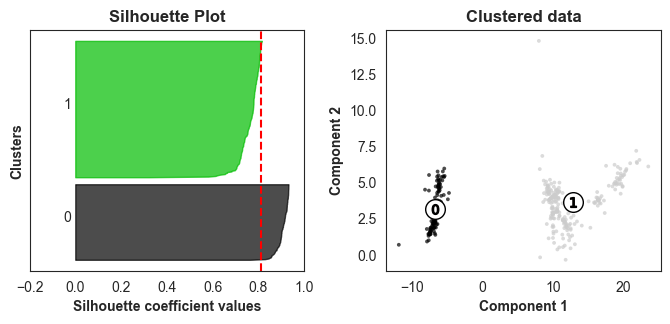

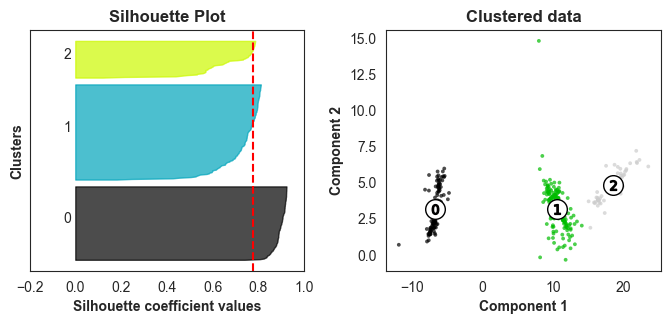

[0.813266, 0.7765503]
[4028.43408203125, 1181.466552734375]


In [122]:
# mpl.rcParams['font.size'] = 10
reducer = umap.UMAP(n_neighbors=20, random_state=13, densmap=True)
transformed_data = reducer.fit_transform(penguins_standardised_df[['BL / mm', 'BD / mm', 'FL / mm', 'BM / g']])
scores = []
inertias = []
for i in range(2,4):
    kmm = KMeans(n_clusters=i, max_iter =5000, random_state=13)
    kmm.fit(transformed_data)
    cluster_labels = kmm.fit_predict(transformed_data)
    inertias.append(kmm.inertia_)
    if not(i==1):
        silhouette_avg = silhouette_score(transformed_data, cluster_labels)
        sample_silhouette_values = silhouette_samples(transformed_data, cluster_labels)
        scores.append(silhouette_avg)
        # inertias.append(kmm.inertia_)
        fig, ax = plt.subplots(1,2,figsize=(7, 3))
        fig.tight_layout()
        y_lower = 10
        for j in range(i):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(j) / i)
            ax[0].fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(j))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax[0].set_title("Silhouette Plot",fontweight='bold')
        ax[0].set_xlabel("Silhouette coefficient values", fontweight='bold')
        ax[0].set_ylabel("Clusters",fontweight='bold')

        # The vertical line for average silhouette score of all the values
        ax[0].axvline(x=silhouette_avg, color="red", linestyle="--")

        ax[0].set_yticks([])  # Clear the yaxis labels / ticks
        ax[0].set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / j)
        ax[1].scatter(
            transformed_data[:, 0], transformed_data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = kmm.cluster_centers_
        # Draw white circles at cluster centers
        ax[1].scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax[1].scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax[1].set_title("Clustered data",fontweight='bold')
        ax[1].set_xlabel("Component 1",fontweight='bold')
        ax[1].set_ylabel("Component 2",fontweight='bold')
        plt.subplots_adjust(wspace=0.3)
        plt.show()


print(scores)
print(inertias)

In [106]:
penguins_standardised_df

,Species,Island,BL / mm,BD / mm,FL / mm,BM / g,Sex
1,0,0,-0.896042,0.780732,-1.426752,-0.568475,0
2,0,0,-0.822788,0.119584,-1.069474,-0.506286,1
3,0,0,-0.676280,0.424729,-0.426373,-1.190361,1
5,0,0,-1.335566,1.085877,-0.569284,-0.941606,1
6,0,0,-0.859415,1.747026,-0.783651,-0.692852,0
...,...,...,...,...,...,...,...
340,2,2,2.162314,1.340165,0.431094,-0.257532,0
341,2,2,-0.090248,0.475587,0.073816,-1.003795,1
342,2,2,1.026876,0.526444,-0.569284,-0.537380,0
343,2,2,1.246638,0.933305,0.645461,-0.133155,0


In [167]:
penguins_standardised_df_r = penguins_standardised_df.reset_index()

In [165]:
penguins_standardised_df

,Species,Island,BL / mm,BD / mm,FL / mm,BM / g,Sex
1,0,0,-0.896042,0.780732,-1.426752,-0.568475,0
2,0,0,-0.822788,0.119584,-1.069474,-0.506286,1
3,0,0,-0.676280,0.424729,-0.426373,-1.190361,1
5,0,0,-1.335566,1.085877,-0.569284,-0.941606,1
6,0,0,-0.859415,1.747026,-0.783651,-0.692852,0
...,...,...,...,...,...,...,...
340,2,2,2.162314,1.340165,0.431094,-0.257532,0
341,2,2,-0.090248,0.475587,0.073816,-1.003795,1
342,2,2,1.026876,0.526444,-0.569284,-0.537380,0
343,2,2,1.246638,0.933305,0.645461,-0.133155,0


[0.813266, 0.7765503]
[4028.43408203125, 1181.466552734375]


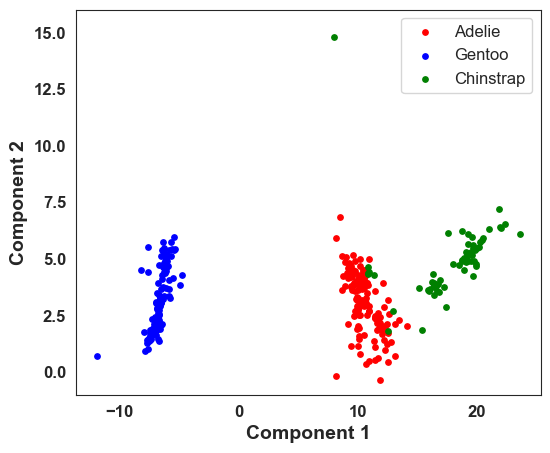

In [173]:
plt.figure(figsize=(6,5))
plt.scatter(
    transformed_data[penguins_standardised_df_r[penguins_standardised_df_r["Species"]==0].index, 0],
    transformed_data[penguins_standardised_df_r[penguins_standardised_df_r["Species"]==0].index, 1],
    c='r', s=15)
plt.scatter(
    transformed_data[penguins_standardised_df_r[penguins_standardised_df_r["Species"]==1].index, 0],
    transformed_data[penguins_standardised_df_r[penguins_standardised_df_r["Species"]==1].index, 1],
    c='b', s=15)
plt.scatter(
    transformed_data[penguins_standardised_df_r[penguins_standardised_df_r["Species"]==2].index, 0],
    transformed_data[penguins_standardised_df_r[penguins_standardised_df_r["Species"]==2].index, 1],
    c='g', s=15)
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the Penguin dataset', fontsize=24)
plt.xlabel("Component 1",fontsize=14,fontweight='bold')
plt.ylabel("Component 2",fontsize=14,fontweight='bold')
plt.xticks([-10,0,10,20], fontsize=12, fontweight="bold")
plt.ylim(-1,16)
plt.yticks([0,2.5,5,7.5,10,12.5,15],fontsize=12,fontweight="bold")
plt.legend(['Adelie','Gentoo','Chinstrap'], fontsize='large')
print(scores)
print(inertias)

Optimal clusters:  3


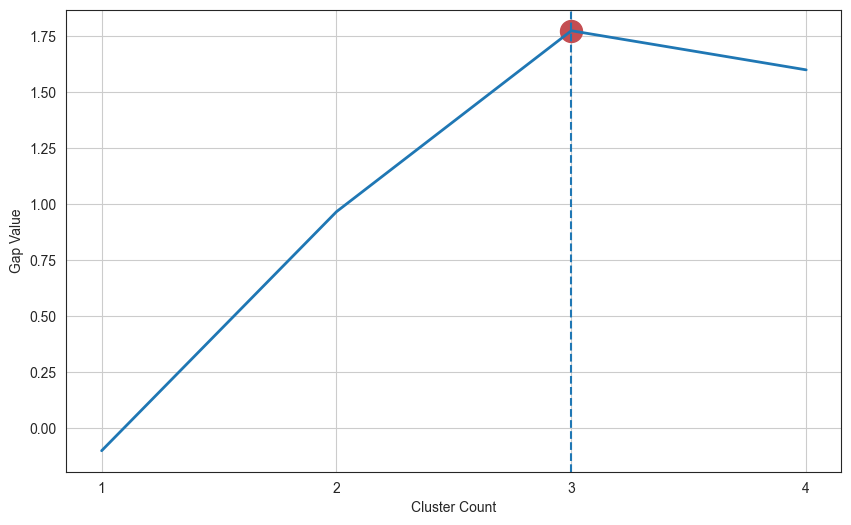

In [214]:
optimalK = OptimalK(clusterer=KMeans_clustering_func)

n_clusters = optimalK(transformed_data, cluster_array=np.arange(1,5))

print('Optimal clusters: ', n_clusters)
#--------------------Gap Statistics data frame
optimalK.gap_df[['n_clusters', 'gap_value']]

plt.figure(figsize=(10,6))
n_clusters=3
plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=2)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
# plt.title('Gap Values by Cluster Count')
custom_ticks = [1, 2, 3, 4]  # Your custom ticks
plt.xticks(custom_ticks)
plt.axvline(3, linestyle="--")
plt.show()

# optimalK.plot_results()

### Supervised Learning

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.dummy import DummyClassifier

In [31]:
x = penguins_df[['BL / mm', 'BD / mm', 'FL / mm', 'BM / g']].to_numpy()
y = penguins_df[['Species']].to_numpy()
x_stnd = penguins_standardised_df[['BL / mm', 'BD / mm', 'FL / mm', 'BM / g']].to_numpy()

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=13)
xtrain_stnd, xtest_stnd, ytrain_stnd, ytest_stnd = train_test_split(x_stnd, y, test_size=0.2, random_state=13)

#### Baseline

In [33]:
cv = KFold(n_splits=5,random_state=13, shuffle=True)

strategy = ["most_frequent", "prior", "stratified", "uniform"]

train_f1 = [[] for _ in range(len(strategy))]
val_f1 = [[] for _ in range(len(strategy))]

for i,strat in enumerate(strategy):
        dummy_clf = DummyClassifier(strategy=strat, random_state=13)
        for train_index, test_index in cv.split(xtrain):
                xtr, xval, ytr, yval = xtrain[train_index], xtrain[test_index], ytrain[train_index], ytrain[test_index]
                model=dummy_clf.fit(xtr, ytr)
                ypredtrain=model.predict(xtr)
                ypredval=model.predict(xval)
                train_f1[i].append(f1_score(ytr,ypredtrain, average='macro'))
                val_f1[i].append(f1_score(yval,ypredval,average='macro'))

print(np.mean(val_f1, axis=1))

[0.19851259 0.19851259 0.34778202 0.38769726]


In [48]:
dummy_clf = DummyClassifier(strategy="uniform", random_state=13)
model=dummy_clf.fit(xtrain, ytrain)
ypredtest=model.predict(xtest)
print(f1_score(ytest,ypredtest, average='macro'))

0.3582607868322154


##### KNN

In [36]:
cv = KFold(n_splits=5,random_state=13, shuffle=True)

max_k = 30
trainf1 = [[] for _ in range(max_k)]
valf1 = [[] for _ in range(max_k)]

 
for k in range(max_k):
    knn = KNeighborsClassifier(n_neighbors=k+1)
    for train_index, test_index in cv.split(xtrain_stnd):
        xtr, xval, ytr, yval = xtrain_stnd[train_index], xtrain_stnd[test_index], ytrain_stnd[train_index], ytrain_stnd[test_index]
        model=knn.fit(xtr, ytr)
        ypredtrain=model.predict(xtr)
        ypredval=model.predict(xval)
        trainf1[k].append(f1_score(ytr,ypredtrain,average='macro'))
        valf1[k].append(f1_score(yval,ypredval,average='macro'))

mean_train_f1 = np.mean(trainf1, axis=1)
mean_val_f1 = np.mean(valf1, axis=1)

c:\Users\rajdh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\rajdh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\rajdh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\rajdh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [38]:
mean_val_f1[4]

0.9908913556008624

Text(0, 0.5, 'Macro-Averaged F1 Score')

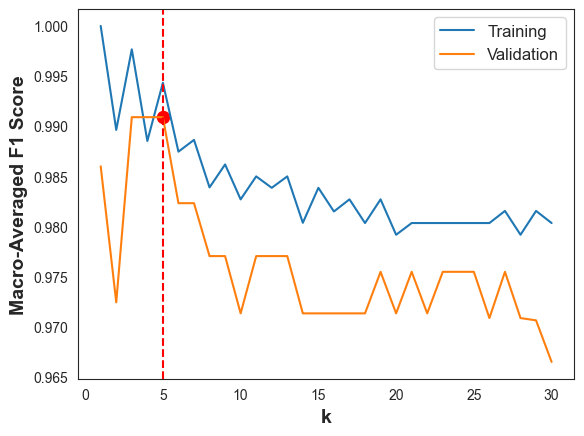

In [49]:
x_ax = range(1, max_k+1)
plt.plot(x_ax, mean_train_f1, label='Training')
plt.plot(x_ax, mean_val_f1, label='Validation')
plt.axvline(5, linestyle="--", c='red')
plt.scatter(5,mean_val_f1[4], s=75, c='r')
plt.legend(fontsize='large')
plt.xlabel('k',fontsize=14, fontweight="bold")
plt.ylabel('Macro-Averaged F1 Score', fontsize=14,fontweight="bold")

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)
model=knn.fit(xtrain_stnd, ytrain_stnd)
ypredtest=model.predict(xtest_stnd)
print(f1_score(ytest_stnd,ypredtest,average='macro'))

0.9450746268656717


c:\Users\rajdh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [89]:
from sklearn.model_selection import GridSearchCV
neighbors = [(i+1) for i in range(50)]
parameters = {'n_neighbors':neighbors}
knn = KNeighborsClassifier()
clf = GridSearchCV(estimator=knn, scoring="f1_micro",param_grid=parameters)
clf.fit(xtrain_stnd, ytrain_stnd)
print(clf.cv_results_)
print(clf.best_estimator_)
print(clf.best_score_)

c:\Users\rajdh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\rajdh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\rajdh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\rajdh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

{'mean_fit_time': array([0.00661006, 0.00104342, 0.00061793, 0.00099516, 0.00081639,
       0.00134325, 0.00130858, 0.00102239, 0.00113487, 0.00060024,
       0.00039997, 0.00069404, 0.00063448, 0.00099864, 0.0010366 ,
       0.00039992, 0.00079999, 0.00040088, 0.00039811, 0.00059977,
       0.00039492, 0.00081506, 0.00101314, 0.000808  , 0.00079541,
       0.00099916, 0.00083756, 0.00101342, 0.00083575, 0.00059562,
       0.00079994, 0.00088   , 0.00058484, 0.00082307, 0.00060506,
       0.0008009 , 0.00044165, 0.00085731, 0.00019975, 0.00101633,
       0.00087738, 0.00100098, 0.00079155, 0.00059972, 0.00068841,
       0.0008112 , 0.00100846, 0.00083823, 0.00086579, 0.00042076]), 'std_fit_time': array([1.14099491e-02, 5.13369183e-05, 8.31771104e-04, 1.79742943e-05,
       4.09334648e-04, 4.41753972e-04, 5.60862538e-04, 6.33602053e-04,
       6.87498302e-04, 4.90096066e-04, 4.89862464e-04, 4.08636174e-04,
       5.19791663e-04, 2.11964710e-06, 4.71293651e-05, 4.89804093e-04,
       4.0

c:\Users\rajdh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\rajdh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\rajdh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\rajdh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

#### Decision Trees

In [829]:
max_depth = [None, 2, 3, 4, 5, 6, 7, 8]
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7]

len_1 = len(max_depth)
len_2 = len(min_samples_split)
len_3 = len(min_samples_leaf)
total = len_1*len_2*len_3

params_test = []
train_accu = -1
max_test_accu = -1


mean_train = []
mean_test = []

for i in max_depth:
    for j in min_samples_split:
        for k in min_samples_leaf:
            clf = DecisionTreeClassifier(max_depth=i, min_samples_split=j, min_samples_leaf=k, criterion='entropy', random_state=13)
            train_accuracy_mat = []
            test_accuracy_mat = []
            param = [i,j,k]
            params_test.append(param)
            for train_index, test_index in cv.split(x):
                xtr, xtest, ytr, ytest = x[train_index], x[test_index], y[train_index], y[test_index]
                model=clf.fit(xtr, ytr)
                ypredtrain=model.predict(xtr)
                ypredtest=model.predict(xtest)
                train_accuracy_mat.append(accuracy_score(ytr,ypredtrain))
                test_accuracy_mat.append(accuracy_score(ytest,ypredtest))
            mean_test.append(np.mean(test_accuracy_mat))
            mean_train.append(np.mean(train_accuracy_mat))

In [789]:
print(mean_test)
print(mean_train)
print(params_test)

[0.9669380370872908, 0.9609678878335595, 0.9699683401175939, 0.9699683401175939, 0.9549072817729535, 0.9518769787426503, 0.9488466757123474, 0.9669380370872908, 0.9609678878335595, 0.9699683401175939, 0.9699683401175939, 0.9549072817729535, 0.9518769787426503, 0.9488466757123474, 0.9669380370872908, 0.9609678878335595, 0.9699683401175939, 0.9699683401175939, 0.9549072817729535, 0.9518769787426503, 0.9488466757123474, 0.9699683401175939, 0.9699683401175939, 0.9699683401175939, 0.9699683401175939, 0.9549072817729535, 0.9518769787426503, 0.9488466757123474, 0.9669380370872908, 0.9669380370872908, 0.9699683401175939, 0.9699683401175939, 0.9549072817729535, 0.9518769787426503, 0.9488466757123474, 0.9669380370872908, 0.9669380370872908, 0.9699683401175939, 0.9699683401175939, 0.9549072817729535, 0.9518769787426503, 0.9488466757123474, 0.9639077340569878, 0.9639077340569878, 0.9669380370872908, 0.9699683401175939, 0.9549072817729535, 0.9518769787426503, 0.9488466757123474, 0.9639529624604251,

In [830]:
print(max(mean_test))
print(mean_train[mean_test.index(max(mean_test))])
print(params_test[mean_test.index(max(mean_test))])

0.9669832654907282
0.987240573343471
[None, 2, 3]


In [705]:
print(best_params_test)
print(max_test_accu)

[None, 2, 4]
0.9701492537313433


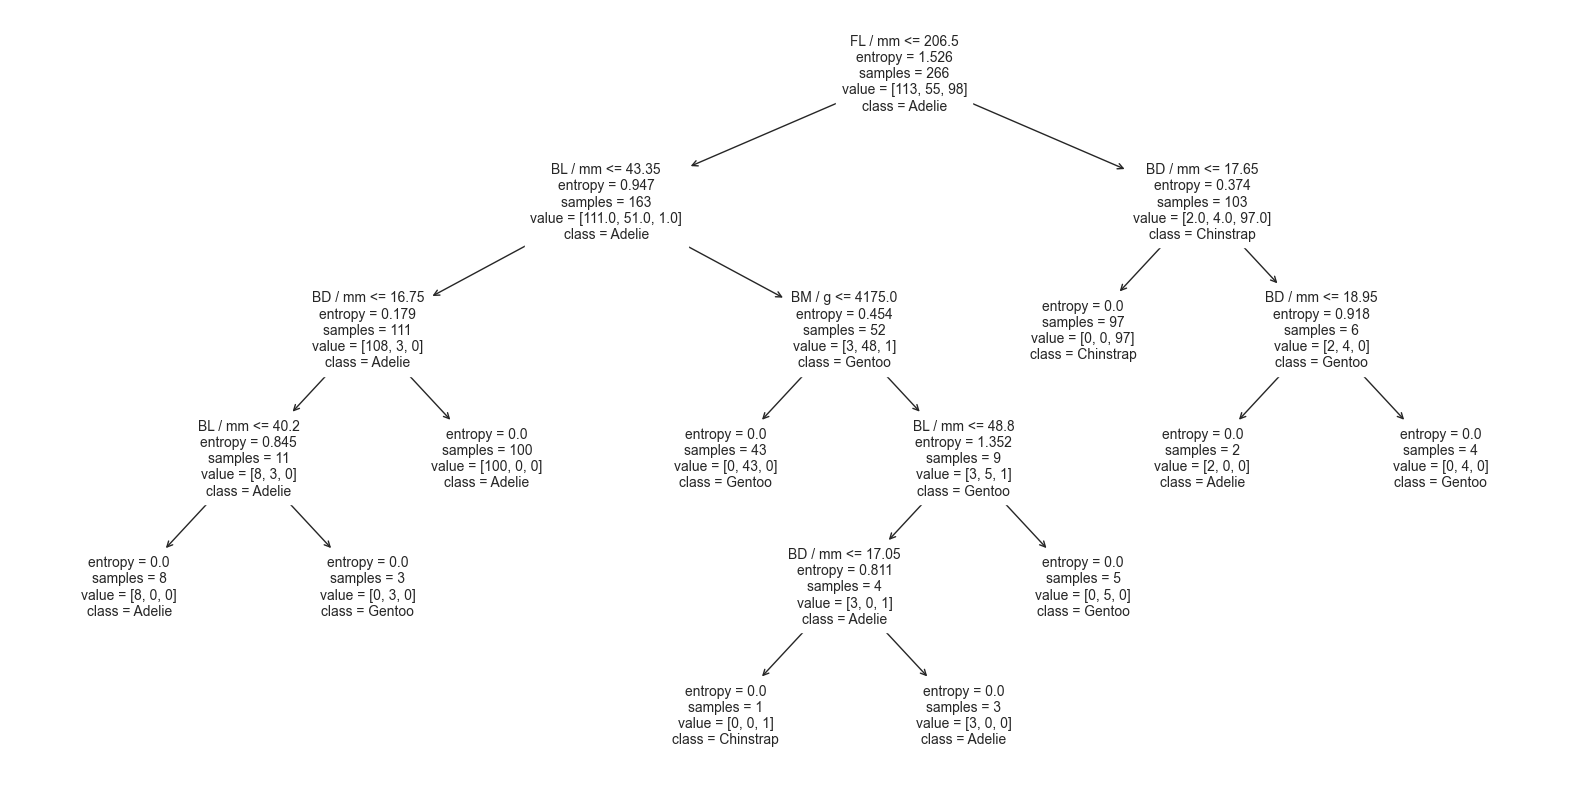

In [679]:
plt.rcParams['figure.figsize'] = [20, 10]
classes= penguins_df['Species'].unique()
features = penguins_df.columns[2:6].to_list()
features = ['BL / mm', 'BD / mm', 'FL / mm', 'BM / g']
plot_tree(decision_tree=clf,feature_names=features,class_names=classes,fontsize=10)
plt.show()

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
from sklearn.model_selection import GridSearchCV
n_estimators = [50,75,100,125,150]
max_depth = [None, 2, 3, 4, 5]
parameters = {"n_estimators":n_estimators,"max_depth":max_depth}
RF = RandomForestClassifier(random_state=13, criterion="entropy")
clf = GridSearchCV(estimator=RF, scoring="f1_macro",param_grid=parameters)
clf.fit(xtrain, ytrain)
print(clf.cv_results_)
print(clf.best_estimator_)
print(clf.best_score_)

c:\Users\rajdh\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\rajdh\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\rajdh\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\rajdh\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

{'mean_fit_time': array([0.04775176, 0.07622032, 0.10390086, 0.11342139, 0.14253907,
       0.04011917, 0.0702035 , 0.08559661, 0.10949349, 0.13397813,
       0.05063071, 0.07265067, 0.09191294, 0.10284524, 0.13883557,
       0.04985986, 0.0733829 , 0.09010277, 0.12238874, 0.13253312,
       0.04717736, 0.07083263, 0.09467411, 0.13117018, 0.13654399]), 'std_fit_time': array([0.00566936, 0.01290034, 0.00745016, 0.00793502, 0.01124773,
       0.00811531, 0.00564918, 0.00829726, 0.00974529, 0.00367155,
       0.0151699 , 0.00916434, 0.01346224, 0.00639382, 0.00698085,
       0.00545636, 0.00707057, 0.00730762, 0.00698554, 0.01166708,
       0.00621538, 0.00454925, 0.00662933, 0.0103824 , 0.01682843]), 'mean_score_time': array([0.00659161, 0.00728321, 0.00398006, 0.009163  , 0.00471992,
       0.00958333, 0.00399513, 0.01028943, 0.004705  , 0.00887222,
       0.00631409, 0.00064411, 0.00476274, 0.01246362, 0.00314803,
       0.        , 0.00011926, 0.00409622, 0.00546985, 0.00974631,
     

c:\Users\rajdh\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [46]:
RF = RandomForestClassifier(n_estimators=75,random_state=13, criterion="entropy")
RF.fit(xtrain, ytrain)
ypred = RF.predict(xtest)
print(f1_score(ytest,ypred,average="macro"))

0.9450746268656717


c:\Users\rajdh\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
